# DiploDatos 2021


### Categorización de publicaciones de productos realizadas en Mercado Libre

### 01 - Análisis y Visualización

#### Condiciones generales que aplican a todos los prácticos:
   - Las notebooks tienen que ser 100% reproducibles, es decir al ejecutar las celdas tal cuál como se entrega la notebook se deben obtener los mismos resultados sin errores.
   - Código legible, haciendo buen uso de las celdas de la notebook y en lo posible seguir estándares de código para Python (https://www.python.org/dev/peps/pep-0008/).
   - Utilizar celdas tipo "Markdown" para ir guiando el análisis.
   - Limpiar el output de las celdas antes de entregar el notebook (ir a Kernel --> Restart Kernel and Clear All Ouputs).
   - Incluir conclusiones del análisis que se hizo en la sección "Conclusiones". Tratar de aportar valor en esta sección, ser creativo.

## 1. Consignas

#### Sección A:  Estadísticas básicas & Visualizaciones

Por cada uno de los siguientes puntos realizar un análisis para poder responder el enunciado/pregunta y generar alguna gráfica para visualizar los resultados:

1. Cuántas publicaciones de items hay dentro de cada categoría.
2. Proporción de publicaciones en español y portugués dentro de cada categoría.
3. Proporción de label quality dentro de cada categoría.
4. Relación entre el label quality y el idioma.

#### Sección B: Estadísticas de las publicaciones & Visualizaciones

Por cada uno de los siguientes puntos realizar un análisis para poder responder el enunciado/pregunta y generar alguna gráfica para visualizar los resultados:

1. Cantidad promedio de palabras del título de la publicacion por categoría.
2. Análisis general de stopwords, números, caracteres especiales, etc. Puede ser un recuento promedio por publicación, no es necesario realizar una gráfica en este punto.
3. Palabras más frecuentes dentro de cada categoría (sin incluir stopwords, números, caracteres especiales, etc).

Tener en cuenta librerías como *NLTK* y *spaCy* para el procesamiento de texto.

## 2. Código y análisis

Importaciones necesarias

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

Lectura de dataset reducido

In [2]:
df_dataset = pd.read_csv('DataSet/dataset.csv')

Estudiamos el dataset brevemente antes de comenzar a operar sobre el mismo

In [3]:
df_dataset.columns

Index(['title', 'label_quality', 'language', 'category'], dtype='object')

In [4]:
df_dataset.shape

(646760, 4)

In [5]:
df_dataset.describe()

,title,label_quality,language,category
count,646760,646760,646760,646760
unique,646019,2,2,20
top,Yamaha Psr,unreliable,portuguese,PANTS
freq,2,551878,328992,35973


In [6]:
df_dataset.label_quality.unique()

array(['unreliable', 'reliable'], dtype=object)

In [7]:
df_dataset.language.unique()

array(['portuguese', 'spanish'], dtype=object)

In [8]:
df_dataset.category.unique()

array(['SEWING_MACHINES', 'MUSICAL_KEYBOARDS', 'REFRIGERATORS',
       'BABY_CAR_SEATS', 'WALL_CLOCKS', 'BABY_STROLLERS', 'SHORTS',
       'SUITCASES', 'PUREBRED_DOGS', 'ROLLER_SKATES', 'COFFEE_MAKERS',
       'WINES', 'MATTRESSES', 'PANTS', 'MEMORY_CARDS', 'ELECTRIC_DRILLS',
       'MOTORCYCLE_JACKETS', 'HAIR_CLIPPERS', 'RANGES', 'KITCHEN_SINKS'],
      dtype=object)

Tenemos 646760 productos en nuestro dataframe, con las variables
- `title` la mayoría de los títulos son únicos
- `label_quality` solo se separan en *unreliable* y *reliable*
- `language` solo se separan en *portuguese* y *spanish*
- `category` hay un total de veinte categorías diferentes

## Sección A

#### 1 - Contamos la cantidad de items por categoría.

In [9]:
category_count = df_dataset.category.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'category', 'category': 'count'})

category_count

,category,count
0,PANTS,35973
1,COFFEE_MAKERS,35104
2,BABY_CAR_SEATS,34163
3,MUSICAL_KEYBOARDS,33222
4,MATTRESSES,32967
5,PUREBRED_DOGS,32928
6,RANGES,32645
7,REFRIGERATORS,32635
8,MOTORCYCLE_JACKETS,32615
9,HAIR_CLIPPERS,32372


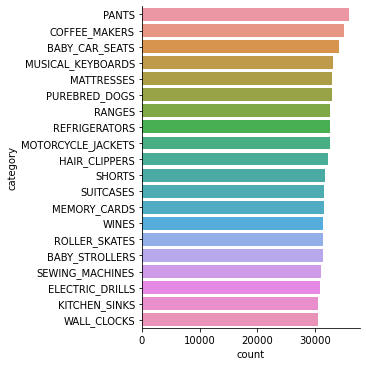

In [10]:
# Mostramos en catplot la cantidad de items por categoría
sns.catplot(x='count', y='category', data=category_count, kind='bar');

#### 2 - Proporción de publicaciones en español y portugués dentro de cada categoría.

In [11]:
category_lenguage_count = df_dataset.groupby(['category', 'language'], as_index=False).count()
category_lenguage_count = category_lenguage_count.drop(['label_quality'], axis=1)
category_lenguage_count = category_lenguage_count.rename(columns = {'title': 'frecuency'}, inplace = False)
category_lenguage_percent = pd.merge(category_lenguage_count, category_count, on='category')
category_lenguage_percent['PorcentajeLenguaje'] = (category_lenguage_percent['frecuency'] * 100)/category_lenguage_percent['count']
category_lenguage_percent = category_lenguage_percent.drop(['frecuency','count'], axis=1)

category_lenguage_percent

,category,language,PorcentajeLenguaje
0,BABY_CAR_SEATS,portuguese,47.683166
1,BABY_CAR_SEATS,spanish,52.316834
2,BABY_STROLLERS,portuguese,51.810034
3,BABY_STROLLERS,spanish,48.189966
4,COFFEE_MAKERS,portuguese,50.156677
5,COFFEE_MAKERS,spanish,49.843323
6,ELECTRIC_DRILLS,portuguese,48.812459
7,ELECTRIC_DRILLS,spanish,51.187541
8,HAIR_CLIPPERS,portuguese,50.889658
9,HAIR_CLIPPERS,spanish,49.110342


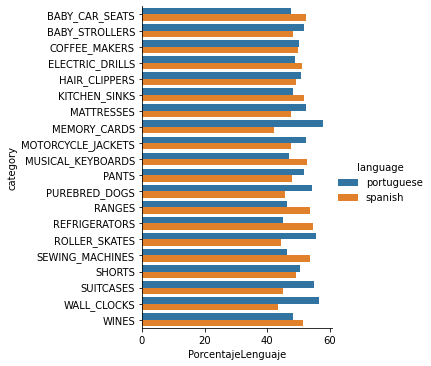

In [12]:
# Mostramos en catplot la proporción de publicaciones en español y portugués dentro de cada categoría
sns.catplot(x='PorcentajeLenguaje', y='category', hue ='language', data=category_lenguage_percent, kind='bar');

# Alternativas

In [13]:
# Normalizar nos permite obtener la proporción (en lugar de la cantidad)
pd.crosstab(index=df_dataset['category'],
            columns=df_dataset['language'],
            normalize='index',
            margins=True)

language,portuguese,spanish
category,,
BABY_CAR_SEATS,0.476832,0.523168
BABY_STROLLERS,0.518100,0.481900
COFFEE_MAKERS,0.501567,0.498433
ELECTRIC_DRILLS,0.488125,0.511875
HAIR_CLIPPERS,0.508897,0.491103
KITCHEN_SINKS,0.482912,0.517088
MATTRESSES,0.525071,0.474929
MEMORY_CARDS,0.578412,0.421588
MOTORCYCLE_JACKETS,0.523655,0.476345


In [14]:
# Seleccionamos solo las columnas de interés
lenguajes_x_categoria = df_dataset[['category', 'language']]
categoria = df_dataset[['category']]
# Inicializamos la columna para la cantidad de elementos
lenguajes_x_categoria = lenguajes_x_categoria.assign(cantidad=0)
categoria = categoria.assign(cantidad=0)
# Calculamos las cantidades necesarias
cant_lenguajes_x_categoria = lenguajes_x_categoria.groupby(['category', 'language']).count()
cant_categoria = categoria.groupby('category').count()
# Obtenemos la proporción de lenguajes para cada categoría
df_proporcion = cant_lenguajes_x_categoria / cant_categoria

df_proporcion

cantidad
category           language            
BABY_CAR_SEATS     portuguese  0.476832
                   spanish     0.523168
BABY_STROLLERS     portuguese  0.518100
                   spanish     0.481900
COFFEE_MAKERS      portuguese  0.501567
                   spanish     0.498433
ELECTRIC_DRILLS    portuguese  0.488125
                   spanish     0.511875
HAIR_CLIPPERS      portuguese  0.508897
                   spanish     0.491103
KITCHEN_SINKS      portuguese  0.482912
                   spanish     0.517088
MATTRESSES         portuguese  0.525071
                   spanish     0.474929
MEMORY_CARDS       portuguese  0.578412
                   spanish     0.421588
MOTORCYCLE_JACKETS portuguese  0.523655
                   spanish     0.476345
MUSICAL_KEYBOARDS  portuguese  0.471224
                   spanish     0.528776
PANTS              portuguese  0.519529
                   spanish     0.480471
PUREBRED_DOGS      portuguese  0.543884
                   spanish     0.456116
RANGES             portuguese  0.463777
                   spanish     0.536223
REFRIGERATORS      portuguese  0.451969
                   spanish     0.548031
ROLLER_SKATES      portuguese  0.555449
                   spanish     0.444551
SEWING_MACHINES    portuguese  0.462431
                   spanish     0.537569
SHORTS             portuguese  0.506580
                   spanish     0.493420
SUITCASES          portuguese  0.549652
                   spanish     0.450348
WALL_CLOCKS        portuguese  0.566503
                   spanish     0.433497
WINES              portuguese  0.483646
                   spanish     0.516354

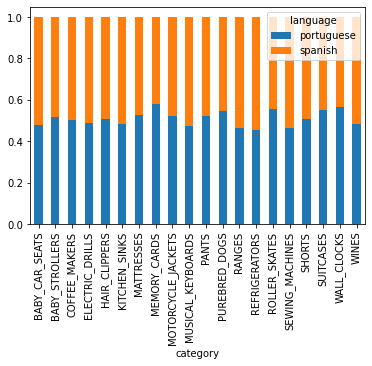

In [15]:
# Visualizamos la proporción de publicaciones en cada idioma, por categoría
df_tabla = pd.crosstab(index=df_dataset['category'], columns=df_dataset['language'], normalize='index')

df_tabla.plot.bar(stacked=True);

#### 3 - Proporción de label quality dentro de cada categoría.

In [16]:
category_lebel_count = df_dataset.groupby(['category', 'label_quality'], as_index=False).count()
category_lebel_count = category_lebel_count.drop(['language'], axis=1)
category_lebel_count = category_lebel_count.rename(columns = {'title': 'frecuency'}, inplace = False)
category_lebel_percent = pd.merge(category_lebel_count, category_count, on='category')
category_lebel_percent['PercentjeLabel'] = (category_lebel_percent['frecuency'] * 100) / category_lebel_percent['count']
category_lebel_percent = category_lebel_percent.drop(['frecuency','count'], axis=1)

category_lebel_percent

,category,label_quality,PercentjeLabel
0,BABY_CAR_SEATS,reliable,16.520797
1,BABY_CAR_SEATS,unreliable,83.479203
2,BABY_STROLLERS,reliable,18.196026
3,BABY_STROLLERS,unreliable,81.803974
4,COFFEE_MAKERS,reliable,15.573724
5,COFFEE_MAKERS,unreliable,84.426276
6,ELECTRIC_DRILLS,reliable,9.931862
7,ELECTRIC_DRILLS,unreliable,90.068138
8,HAIR_CLIPPERS,reliable,14.929569
9,HAIR_CLIPPERS,unreliable,85.070431


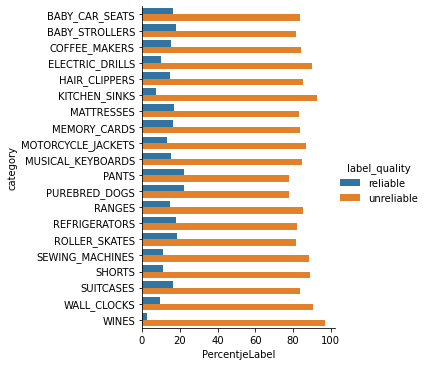

In [17]:
# Mostramos en catplot la proporción de publicaciones en español y portugués dentro de cada categoría
sns.catplot(x='PercentjeLabel', y='category', hue ='label_quality', data=category_lebel_percent, kind='bar');

## Alternativas

In [18]:
# Normalizar nos permite obtener la proporción (en lugar de la cantidad)
pd.crosstab(index=df_dataset['category'],
            columns=df_dataset['label_quality'],
            normalize='index',
            margins=True)

label_quality,reliable,unreliable
category,,
BABY_CAR_SEATS,0.165208,0.834792
BABY_STROLLERS,0.181960,0.818040
COFFEE_MAKERS,0.155737,0.844263
ELECTRIC_DRILLS,0.099319,0.900681
HAIR_CLIPPERS,0.149296,0.850704
KITCHEN_SINKS,0.073674,0.926326
MATTRESSES,0.168411,0.831589
MEMORY_CARDS,0.165663,0.834337
MOTORCYCLE_JACKETS,0.131320,0.868680


In [19]:
# Seleccionamos solo las columnas de interés
etiquetas_x_categoria = df_dataset[['category', 'label_quality']]
categoria = df_dataset[['category']]
# Inicializamos la columna para la cantidad de elementos
etiquetas_x_categoria = etiquetas_x_categoria.assign(cantidad=0)
categoria = categoria.assign(cantidad=0)
# Calculamos las cantidades necesarias
cant_etiquetas_x_categoria = etiquetas_x_categoria.groupby(['category', 'label_quality']).count()
cant_categoria = categoria.groupby('category').count()
# Obtenemos la proporción de etiquetas para cada categoría
df_proporcion = cant_etiquetas_x_categoria / cant_categoria

df_proporcion

cantidad
category           label_quality          
BABY_CAR_SEATS     reliable       0.165208
                   unreliable     0.834792
BABY_STROLLERS     reliable       0.181960
                   unreliable     0.818040
COFFEE_MAKERS      reliable       0.155737
                   unreliable     0.844263
ELECTRIC_DRILLS    reliable       0.099319
                   unreliable     0.900681
HAIR_CLIPPERS      reliable       0.149296
                   unreliable     0.850704
KITCHEN_SINKS      reliable       0.073674
                   unreliable     0.926326
MATTRESSES         reliable       0.168411
                   unreliable     0.831589
MEMORY_CARDS       reliable       0.165663
                   unreliable     0.834337
MOTORCYCLE_JACKETS reliable       0.131320
                   unreliable     0.868680
MUSICAL_KEYBOARDS  reliable       0.155319
                   unreliable     0.844681
PANTS              reliable       0.222945
                   unreliable     0.777055
PUREBRED_DOGS      reliable       0.220542
                   unreliable     0.779458
RANGES             reliable       0.148415
                   unreliable     0.851585
REFRIGERATORS      reliable       0.179378
                   unreliable     0.820622
ROLLER_SKATES      reliable       0.183577
                   unreliable     0.816423
SEWING_MACHINES    reliable       0.113495
                   unreliable     0.886505
SHORTS             reliable       0.109831
                   unreliable     0.890169
SUITCASES          reliable       0.163806
                   unreliable     0.836194
WALL_CLOCKS        reliable       0.093268
                   unreliable     0.906732
WINES              reliable       0.029014
                   unreliable     0.970986

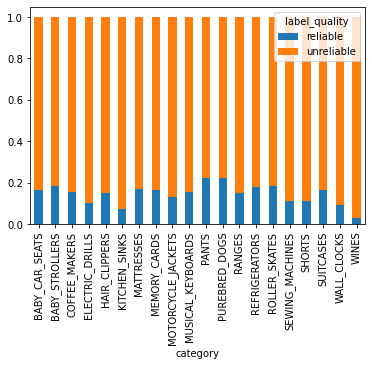

In [20]:
# Visualizamos la proporción de publicaciones con cada etiqueta, por categoría
df_tabla = pd.crosstab(index=df_dataset['category'], columns=df_dataset['label_quality'], normalize='index')

df_tabla.plot.bar(stacked=True);

#### 4 - Relación entre el label quality y el idioma.

In [21]:
category_lenguage_count = df_dataset.groupby(['category', 'language', 'label_quality'], as_index=False).count()
category_lenguage_count = category_lenguage_count.rename(columns = {'title': 'frecuency'}, inplace = False)
relation = pd.merge(category_lenguage_count, category_count, on='category')
relation['PercentLanguage'] = (relation['frecuency'] * 100) / relation['count']
relation = relation.drop(['frecuency','count'], axis=1)

relation

,category,language,label_quality,PercentLanguage
0,BABY_CAR_SEATS,portuguese,reliable,8.040863
1,BABY_CAR_SEATS,portuguese,unreliable,39.642303
2,BABY_CAR_SEATS,spanish,reliable,8.479934
3,BABY_CAR_SEATS,spanish,unreliable,43.836900
4,BABY_STROLLERS,portuguese,reliable,7.460211
...,...,...,...,...
74,WALL_CLOCKS,spanish,reliable,1.483660
75,WALL_CLOCKS,spanish,unreliable,41.866013
76,WINES,portuguese,reliable,2.901366
77,WINES,portuguese,unreliable,45.463231


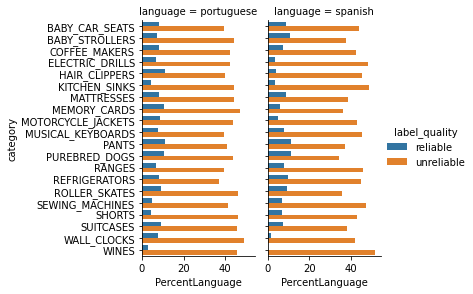

In [22]:
g = sns.catplot(x='PercentLanguage', y='category',
                hue='label_quality', col='language',
                data=relation, kind='bar',
                height=4, aspect=.7);

## Alternativas

In [23]:
# Normalizar nos permite obtener la proporción (en lugar de la cantidad)
pd.crosstab(index=df_dataset['language'],
            columns=df_dataset['label_quality'],
            normalize=True,
            margins=True)

label_quality,reliable,unreliable,All
language,,,
portuguese,0.078111,0.430566,0.508677
spanish,0.068593,0.422730,0.491323
All,0.146704,0.853296,1.000000


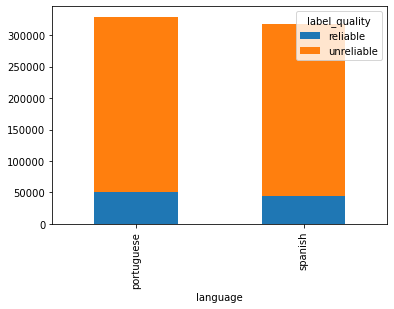

In [24]:
# Visualizamos la proporción de publicaciones con cada lenguaje y etiqueta
df_tabla = pd.crosstab(index=df_dataset['language'], columns=df_dataset['label_quality'])

df_tabla.plot.bar(stacked=True);

## Sección B

#### 1 - Cantidad promedio de palabras en el título de la publicación por categoría.

In [25]:
df_dataset
df_dataset2 = df_dataset.copy()

In [26]:
# Calculo cantidad de palabras de cada título, y lo agrego a la columna countWord
f = lambda df_dataset2: len(df_dataset2['title'].split())
df_dataset2['countWord'] = df_dataset2.apply(f, axis=1)

In [27]:
count_percent_word_category = df_dataset2.groupby('category', as_index=False).mean()
count_percent_word_category

,category,countWord
0,BABY_CAR_SEATS,7.879694
1,BABY_STROLLERS,7.251651
2,COFFEE_MAKERS,7.231284
3,ELECTRIC_DRILLS,8.143543
4,HAIR_CLIPPERS,8.017144
5,KITCHEN_SINKS,8.778619
6,MATTRESSES,7.944611
7,MEMORY_CARDS,9.218318
8,MOTORCYCLE_JACKETS,7.395156
9,MUSICAL_KEYBOARDS,6.869213


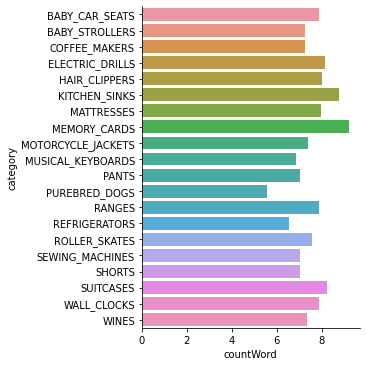

In [28]:
# Mostramos en catplot el promedio de cantidad de palabras por categoría
sns.catplot(x='countWord', y='category', data=count_percent_word_category, kind='bar');

#### 2 - Análisis general de stopwords, números, caracteres especiales, etc.

#### 3 - Palabras más frecuentes dentro de cada categoría.

# Borrador: Usando NLTK

In [29]:
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [30]:
from nltk.tokenize import word_tokenize

# Copiamos el dataset original
df_nlp = df_dataset.copy()

In [31]:
def tokenizer(row):
    """
    Por cada título de publicación, aplicamos el tokenizer.
    """
    return set(word_tokenize(row.title))

In [32]:
# Queremos algo manejable para probar...
aux = df_nlp.sample(5000)

In [33]:
top_N = 5

aux['tokens'] = aux.apply(tokenizer, axis=1)

aux.sample(5)

,title,label_quality,language,category,tokens
155538,Dada 1 2 3 De Finca Las Moras,unreliable,spanish,WINES,"{1, Finca, 2, Moras, De, Dada, Las, 3}"
168170,Calça Jeans King Farm Masculina Tradicional Gr...,unreliable,portuguese,PANTS,"{Farm, Calça, Masculina, Green, Tradicional, J..."
374256,Bermuda Cc Grisino,unreliable,spanish,SHORTS,"{Bermuda, Grisino, Cc}"
257321,Mala De Viagem - Grande Com Rodinhas / Batiki,unreliable,portuguese,SUITCASES,"{Batiki, Mala, Grande, -, Viagem, De, Com, Rod..."
120500,Cuba De Sobrepor Quadrada 93931602 Inox Válvul...,unreliable,portuguese,KITCHEN_SINKS,"{Quadrada, Válvula, Tramontina, Cuba, Inox, So..."


In [34]:
# Convierte todos los títulos de las publicaciones en un solo texto.
doc = aux.title.str.lower().str.cat(sep=' ')

words = nltk.tokenize.word_tokenize(doc)
word_dist = nltk.FreqDist(words)
print (word_dist)

rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Freq'])

# Hay demasiadas stop words...
rslt

<FreqDist with 8904 samples and 38900 outcomes>


,Word,Freq
0,de,1312
1,-,657
2,!,371
3,+,331
4,",",265


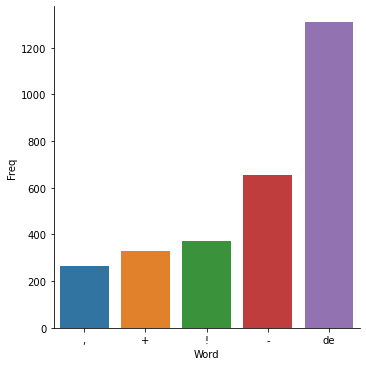

In [35]:
sns.catplot(x='Word', y='Freq', data=rslt.sort_values('Freq'), kind='bar');

# Borrador: Usando Spacy

In [36]:
# Copiamos el dataset original
df_nlp = df_dataset.copy()

In [37]:
import spacy

"""
TODO: Quizás una optimización posible sería cargar solamente los
componentes que vamos a utilizar, es decir, el tokenizer y el tagger
"""

# Modelo para procesar Español
nlp_es = spacy.load('es')
# Modelo para procesar Portugués
nlp_pt = spacy.load('pt')

In [38]:
nlp_lang = {'spanish': nlp_es, 'portuguese': nlp_pt}

def tokenizer(row):
    """
    Dada una fila del dataset, aplica el procesamiento al título:
    - Tokenizer: separa en tokens
    - Tagger: agrega información sintáctica/semántica
    Es importante procesar de acuerdo al lenguaje de la publicación.
    """
    nlp = nlp_lang[row.language]
    # Por cuestiones de eficiencia, solo aplicamos estas etapas.
    return nlp.tagger(nlp.tokenizer(row.title))

In [39]:
# Queremos algo manejable para probar...
aux = df_nlp.sample(5000)

In [40]:
aux['tokens'] = aux.apply(tokenizer, axis=1)

aux.sample(5)

,title,label_quality,language,category,tokens
355040,"Set De 2 Valijas Chica Y Grande, Marca Owen, C...",unreliable,spanish,SUITCASES,"(Set, De, 2, Valijas, Chica, Y, Grande, ,, Mar..."
190974,Pantalón Elastizado Calza Gruesa Tiro Alto Bri...,unreliable,spanish,PANTS,"(Pantalón, Elastizado, Calza, Gruesa, Tiro, Al..."
115881,Korg M1 - Miralo...!! N0 Roland Xps10 Spdsx Kr...,reliable,spanish,MUSICAL_KEYBOARDS,"(Korg, M1, -, Miralo, ..., !, !, N0, Roland, X..."
37996,Caniches Blanco -semi Apricot -nac 14/06/18,reliable,spanish,PUREBRED_DOGS,"(Caniches, Blanco, -semi, Apricot, , -nac, 14..."
358529,Cortapelo Remington Hc1095 12 Piezas Lh Cuotas,unreliable,spanish,HAIR_CLIPPERS,"(Cortapelo, Remington, Hc1095, 12, Piezas, Lh,..."


In [41]:
# Ejercicio 1: Contar la cantidad de tokens.
aux_ammount_tokens = aux.copy()

aux_ammount_tokens['ammount_tokens'] = aux_ammount_tokens.tokens.apply(lambda tokens: len(tokens))

aux_ammount_tokens.sample(5)

,title,label_quality,language,category,tokens,ammount_tokens
127320,Piattelli Arlene Serie Blend - Cafayate Salta ...,unreliable,spanish,WINES,"(Piattelli, Arlene, Serie, Blend, -, Cafayate,...",9
82778,Cafeteira Expresso Italiana 4 Cafés Xícaras Aç...,unreliable,portuguese,COFFEE_MAKERS,"(Cafeteira, Expresso, Italiana, 4, Cafés, Xíca...",8
303114,Filhote Pug Abricot Mini,unreliable,portuguese,PUREBRED_DOGS,"(Filhote, Pug, Abricot, Mini)",4
540255,Bacha Cocina Johnson Luxor Si85 + 4 Acc Y Grif...,unreliable,spanish,KITCHEN_SINKS,"(Bacha, Cocina, Johnson, Luxor, Si85, +, 4, Ac...",11
639585,Cadeira Para Auto Graco Maxi-15 A 36 Kg. Novis...,unreliable,portuguese,BABY_CAR_SEATS,"(Cadeira, Para, Auto, Graco, Maxi-15, A, 36, K...",11


In [42]:
relevant_cols = ['category', 'ammount_tokens']

aux_ammount_tokens = aux_ammount_tokens[relevant_cols].groupby('category')\
    .agg(ammount_tokens_mean=('ammount_tokens', 'mean'))\
    .reset_index()

aux_ammount_tokens

,category,ammount_tokens_mean
0,BABY_CAR_SEATS,8.427509
1,BABY_STROLLERS,7.574297
2,COFFEE_MAKERS,7.426160
3,ELECTRIC_DRILLS,8.746032
4,HAIR_CLIPPERS,8.470356
5,KITCHEN_SINKS,9.327354
6,MATTRESSES,8.708502
7,MEMORY_CARDS,10.899281
8,MOTORCYCLE_JACKETS,7.821970
9,MUSICAL_KEYBOARDS,7.529412


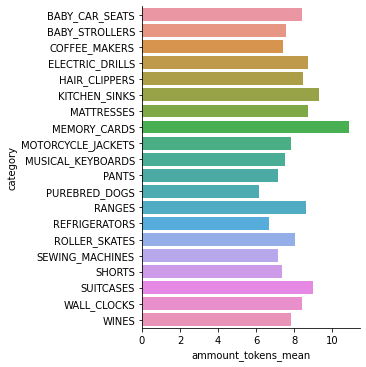

In [43]:
# Mostramos en catplot el promedio de cantidad de tokens por categoría
sns.catplot(x='ammount_tokens_mean', y='category', data=aux_ammount_tokens, kind='bar');

In [44]:
# Ejercicio 2: Contar la cantidad de stop words.
aux_ammount_stop_words = aux.copy()

count_stop_words = lambda tokens: sum(map(lambda t: t.is_stop, tokens))

aux_ammount_stop_words['ammount_stop_words'] = aux_ammount_stop_words.tokens.apply(count_stop_words)

aux_ammount_stop_words.sample(5)

,title,label_quality,language,category,tokens,ammount_stop_words
335618,Patins 4 Rodas Clássico Branco Rosa Menina Rol...,unreliable,portuguese,ROLLER_SKATES,"(Patins, 4, Rodas, Clássico, Branco, Rosa, Men...",0
469638,"Coche Quinny Buzz. Color Rojo, 1 Año De Uso.",unreliable,spanish,BABY_STROLLERS,"(Coche, Quinny, Buzz, ., Color, Rojo, ,, 1, Añ...",2
32500,Cocina Bigas Cg956i 56cm 4 Hornallas Grill Ge ...,unreliable,spanish,RANGES,"(Cocina, Bigas, Cg956i, 56, cm, 4, Hornallas, ...",0
45791,Cafeteira Italiana 6 Xícaras 300ml C/válvula S...,unreliable,portuguese,COFFEE_MAKERS,"(Cafeteira, Italiana, 6, Xícaras, 300ml, C, /,...",0
549152,Yamaha Psr S650 Psrs650 Workstation 61 Tecla S...,unreliable,spanish,MUSICAL_KEYBOARDS,"(Yamaha, Psr, S650, Psrs650, Workstation, 61, ...",0


In [45]:
relevant_cols = ['category', 'ammount_stop_words']

aux_ammount_stop_words = aux_ammount_stop_words[relevant_cols].groupby('category')\
    .agg(ammount_stop_words_mean=('ammount_stop_words', 'mean'))\
    .reset_index()

aux_ammount_stop_words

,category,ammount_stop_words_mean
0,BABY_CAR_SEATS,0.985130
1,BABY_STROLLERS,0.843373
2,COFFEE_MAKERS,0.561181
3,ELECTRIC_DRILLS,0.595238
4,HAIR_CLIPPERS,1.003953
5,KITCHEN_SINKS,0.713004
6,MATTRESSES,0.445344
7,MEMORY_CARDS,0.503597
8,MOTORCYCLE_JACKETS,0.295455
9,MUSICAL_KEYBOARDS,0.431373


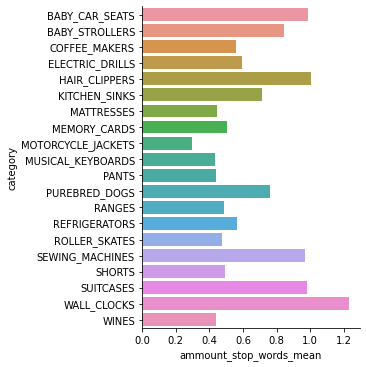

In [46]:
# Mostramos en catplot el promedio de cantidad de stop words por categoría
sns.catplot(x='ammount_stop_words_mean', y='category', data=aux_ammount_stop_words, kind='bar');

In [47]:
# Ejercicio 3: Encontrar las palabras más repetidas.
from collections import Counter

aux_ammount_words = aux.copy()

count_words = lambda tokens: Counter([t.text for t in tokens if not t.is_stop])

aux_ammount_words['ammount_words'] = aux_ammount_words.tokens.apply(count_words)

aux_ammount_words.sample(5)

,title,label_quality,language,category,tokens,ammount_words
149019,Prancha Para Carrinho Britax - Suporte Para Ma...,unreliable,portuguese,BABY_STROLLERS,"(Prancha, Para, Carrinho, Britax, -, Suporte, ...","{'Prancha': 1, 'Carrinho': 1, 'Britax': 1, '-'..."
228543,Estelar Malbec De Bodega Domiciano,unreliable,spanish,WINES,"(Estelar, Malbec, De, Bodega, Domiciano)","{'Estelar': 1, 'Malbec': 1, 'Bodega': 1, 'Domi..."
535293,Trimmer Eléctrico Con Luz Led L959 Looking Goo...,unreliable,spanish,HAIR_CLIPPERS,"(Trimmer, Eléctrico, Con, Luz, Led, L959, Look...","{'Trimmer': 1, 'Eléctrico': 1, 'Luz': 1, 'Led'..."
212381,"Cachorros Salchichas,preciosos",reliable,spanish,PUREBRED_DOGS,"(Cachorros, Salchichas, ,, preciosos)","{'Cachorros': 1, 'Salchichas': 1, ',': 1, 'pre..."
551350,Fogão De Piso Electrolux 4 Queimadores Inox Bi...,unreliable,portuguese,RANGES,"(Fogão, De, Piso, Electrolux, 4, Queimadores, ...","{'Fogão': 1, 'Piso': 1, 'Electrolux': 1, '4': ..."


In [48]:
def agg_counter_sum(series):
    """
    Cada publicación tendrá un conteo de las palabras utilizadas en su título.
    Agrupando por categoría, sumamos los contadores de cada publicación.
    """
    return sum(series, Counter())

In [49]:
relevant_cols = ['category', 'ammount_words']

aux_ammount_words = aux_ammount_words[relevant_cols].groupby('category')\
    .agg(ammount_words_counter=('ammount_words', agg_counter_sum))\
    .reset_index()

aux_ammount_words

,category,ammount_words_counter
0,BABY_CAR_SEATS,"{'Bebê': 36, 'Conforto': 36, 'Galzerano': 6, '..."
1,BABY_STROLLERS,"{'Carrinho': 116, 'Kiddo': 12, 'Iii': 1, 'Maly..."
2,COFFEE_MAKERS,"{'Cafetera': 109, 'Italiana': 20, 'Gat': 1, 'L..."
3,ELECTRIC_DRILLS,"{'Rotor': 1, 'Taladro': 111, 'Black&decker': 1..."
4,HAIR_CLIPPERS,"{'Máquina': 37, 'Profissional': 21, 'Cortar': ..."
5,KITCHEN_SINKS,"{'Rejilla': 1, 'Desagote': 1, 'Acero': 36, 'An..."
6,MATTRESSES,"{'Colchão': 115, 'Ortopédico': 3, 'Solteiro': ..."
7,MEMORY_CARDS,"{'Cartao': 12, 'Sony': 9, 'Sdxc': 27, 'Filmage..."
8,MOTORCYCLE_JACKETS,"{'Jaqueta': 144, 'Forza': 4, 'City': 4, 'Rider..."
9,MUSICAL_KEYBOARDS,"{'Kit': 4, 'Teclado': 173, 'Arranjador': 18, '..."


In [50]:
# Nos quedamos con las 'top_words' de cada categoría.
top_words = 3

top_words_df = aux_ammount_words.copy()

top_words_df['ammount_words_counter'] = top_words_df['ammount_words_counter']\
                                        .apply(lambda x: x.most_common(top_words))

top_words_df

,category,ammount_words_counter
0,BABY_CAR_SEATS,"[(Auto, 100), (Butaca, 82), (-, 69)]"
1,BABY_STROLLERS,"[(Carrinho, 116), (Bebê, 75), (Cochecito, 52)]"
2,COFFEE_MAKERS,"[(Cafetera, 109), (Cafeteira, 84), (-, 36)]"
3,ELECTRIC_DRILLS,"[(Furadeira, 128), (Taladro, 111), (Impacto, 1..."
4,HAIR_CLIPPERS,"[(Maquina, 71), (Wahl, 69), (Cabelo, 60)]"
5,KITCHEN_SINKS,"[(Bacha, 101), (Johnson, 91), (Cocina, 87)]"
6,MATTRESSES,"[(Colchão, 115), (Colchon, 74), (Colchón, 50)]"
7,MEMORY_CARDS,"[(gb, 216), (Sd, 151), (Micro, 150)]"
8,MOTORCYCLE_JACKETS,"[(Jaqueta, 144), (Campera, 105), (Moto, 61)]"
9,MUSICAL_KEYBOARDS,"[(Teclado, 173), (Casio, 79), (Yamaha, 61)]"


Claramente no alcanza con filtrar las *stop words*, también debemos eliminar la puntuación, los símbolos, los números, y los espacios.

In [51]:
# Para un gráfico de barras, deberíamos acomodar nuestro df
list_df = []
for index, row in top_words_df.iterrows():
    for word, count in row.ammount_words_counter:
        list_df.append((row.category, word, count))

plot_df = pd.DataFrame(list_df, columns=['category', 'word', 'count'])

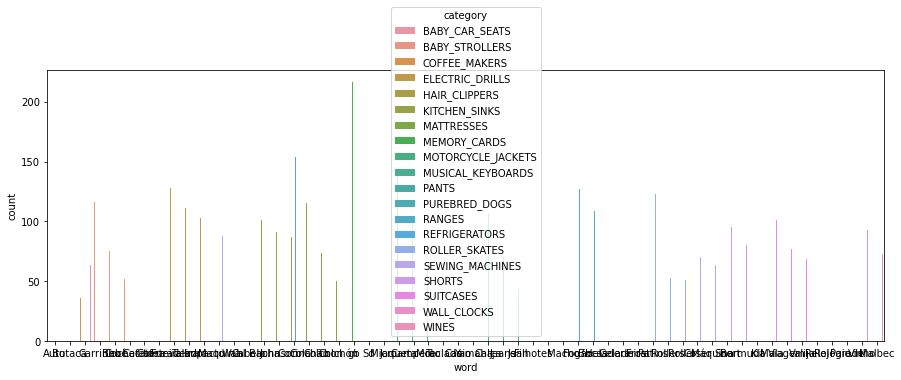

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

"""
TODO: Quizás ploty sea un mejor visualizador...
"""
sns.barplot(x='word', y='count', hue='category', data=plot_df);

# ---------- Borrador ----------

In [53]:
"""
TODO: En realidad quisiéramos contar las siguientes POS
- ENUM: Números y todo lo que sirva para enumerar
- PUNCT: Puntuaciones y lo relacionado
- SYM: Símbolos y caracteres no relacionados al alfabeto
- SPACE: Espacios y lo demás
"""

# Tomamos un título de una publicación cualquiera
ejemplo = aux.iloc[0]['tokens']

for t in ejemplo:
    print(f'¿Es un sustantivo? {t.pos_ == "NOUN"}')
    print(f'Texto {t.text}, Infinitivo {t.lemma_}, POS {t.pos_}, Explicación {spacy.explain(t.pos_)}, ¿Es Stop Word? {t.is_stop}')

¿Es un sustantivo? False
Texto Valija, Infinitivo Valija, POS PROPN, Explicación proper noun, ¿Es Stop Word? False
¿Es un sustantivo? False
Texto Kangol, Infinitivo Kangol, POS PROPN, Explicación proper noun, ¿Es Stop Word? False
¿Es un sustantivo? False
Texto 1, Infinitivo 1, POS NUM, Explicación numeral, ¿Es Stop Word? False
¿Es un sustantivo? False
Texto Solo, Infinitivo Solo, POS PROPN, Explicación proper noun, ¿Es Stop Word? True
¿Es un sustantivo? False
Texto Uso, Infinitivo Uso, POS PROPN, Explicación proper noun, ¿Es Stop Word? True
¿Es un sustantivo? False
Texto Ultralight, Infinitivo Ultralight, POS PROPN, Explicación proper noun, ¿Es Stop Word? False


**STOPWORD**

In computing, **stop words** are words which are filtered out before or after *processing of natural language* data (text).
Though **stop words** usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list.

Necesitamos modelos para cada uno de los lenguajes.

**Portugués**
- `pt_core_news_sm`

**Español**
- `es_core_news_sm`

In [54]:
import spacy

nlp_es = spacy.load('es')

doc = nlp_es('Esto es una frase.')

print([(w.text, w.pos_) for w in doc])

[('Esto', 'PRON'), ('es', 'AUX'), ('una', 'DET'), ('frase', 'NOUN'), ('.', 'PUNCT')]


In [55]:
cols = ('text', 'lemma', 'POS', 'explain', 'stopword')
rows = []

for t in doc:
    row = [t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
    rows.append(row)

pd.DataFrame(rows, columns=cols)

,text,lemma,POS,explain,stopword
0,Esto,Esto,PRON,pronoun,True
1,es,ser,AUX,auxiliary,True
2,una,uno,DET,determiner,True
3,frase,frase,NOUN,noun,False
4,.,.,PUNCT,punctuation,False


In [56]:
from spacy import displacy

displacy.render(doc, style='dep')

In [57]:
# Stop Words para Español
from spacy.lang.es.stop_words import STOP_WORDS

print(f'Cantidad SW para Español: {len(STOP_WORDS)}')

Cantidad SW para Español: 551


In [58]:
import spacy

nlp_pt = spacy.load('pt')

doc = nlp_pt('Esta é uma frase.')

print([(w.text, w.pos_) for w in doc])

[('Esta', 'PRON'), ('é', 'AUX'), ('uma', 'DET'), ('frase', 'NOUN'), ('.', 'PUNCT')]


## 3. Conclusiones

In [59]:
# TO DO